# <center> Udacity Data Analysis Nanodegree </center>
   ## <center> Project: Weather Trends Dataset </center>
   ### <center> Noaman Mangera, June 2020 <center>



## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

In [47]:
#import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>

## Data Wrangling

In [48]:
#read in dataset with London temperatures
df_london = pd.read_csv(r'C:\Users\noama\LondonTemperature.csv')

In [49]:
#inspect first 5 rows of dataset with temperature data on London
df_london.head()

,year,city,country,avg_temp
0,1743,London,United Kingdom,7.54
1,1744,London,United Kingdom,10.34
2,1745,London,United Kingdom,4.13
3,1746,London,United Kingdom,NaN
4,1747,London,United Kingdom,NaN


In [50]:
#read in dataset with global temepratures
df_global = pd.read_csv(r"C:\Users\noama\GlobalTemperature.csv")

In [51]:
#inspect first 5 rows of dataset with global temperature data 
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [52]:
#combine London data with global data
df = pd.merge(df_london, df_global, how='outer', on='year', suffixes=('_london', '_global'))

In [53]:
#inspects first 5 rows of combined temperature dataset
df.head()

,year,city,country,avg_temp_london,avg_temp_global
0,1743,London,United Kingdom,7.54,NaN
1,1744,London,United Kingdom,10.34,NaN
2,1745,London,United Kingdom,4.13,NaN
3,1746,London,United Kingdom,NaN,NaN
4,1747,London,United Kingdom,NaN,NaN


In [54]:
#remove city and country columns from merged datset
df = df.drop(columns=['city', 'country'])

<a id='eda'></a>
## Exploratory Data Analysis

In [55]:
#inspect number of rows and columns
df.shape

(273, 3)

In [56]:
#calculate 10 year rolling for london temperatures 
df['roll10_London'] = df.avg_temp_london.rolling(10).mean()

In [57]:
#calculate 10 year rolling for global temperatures
df['roll10_Global'] = df.avg_temp_global.rolling(10).mean()

In [58]:
#calculate summary statistics for numerical variables 
df.describe()

,year,avg_temp_london,avg_temp_global,roll10_London,roll10_Global
count,273.000000,267.000000,266.000000,255.000000,257.000000
mean,1879.000000,9.435880,8.369474,9.450353,8.353961
std,78.952517,0.751648,0.584747,0.370030,0.452483
min,1743.000000,4.130000,5.780000,8.802000,7.203000
25%,1811.000000,9.040000,8.082500,9.203000,8.059000
50%,1879.000000,9.420000,8.375000,9.415000,8.275000
75%,1947.000000,9.880000,8.707500,9.620500,8.642000
max,2015.000000,11.190000,9.830000,10.701000,9.594000


In [59]:
#reshape merged dataset into tidy form 
df_melt_roll10 = df.melt(id_vars=['year', 'avg_temp_london', 'avg_temp_global'], var_name='Location',  value_name='Temperature', )

In [60]:
#inspect first five rows of tidy dataset
df_melt_roll10.head()

,year,avg_temp_london,avg_temp_global,Location,Temperature
0,1743,7.54,NaN,roll10_London,NaN
1,1744,10.34,NaN,roll10_London,NaN
2,1745,4.13,NaN,roll10_London,NaN
3,1746,NaN,NaN,roll10_London,NaN
4,1747,NaN,NaN,roll10_London,NaN


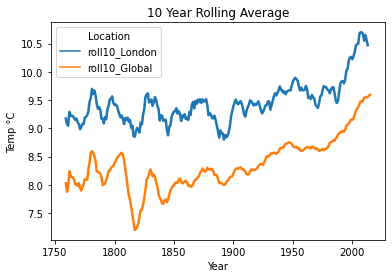

In [61]:
#create line plot of rolling average temperatures
g = sns.lineplot(df_melt_roll10.year, df_melt_roll10.Temperature, hue=df_melt_roll10.Location, palette="tab10", linewidth=2.5);

#set title and axis labels
g.set(title = '10 Year Rolling Average', xlabel = 'Year', ylabel = 'Temp °C' );


In [62]:
#export visualisation
g.get_figure().savefig('10 Year Rolling Average.png')

<a id='conclusion'></a>
## Conclusion

**Question: Is London hotter or cooler compared to the global average?**
> Answer: London is warmer than the global average, by around 1 degree

**Question: Has the difference been consistent over time?**
> Answer: Yes, the difference appears to be consistent over time.

**Question: How does London's temperature compare to the changes in the global average over time?** 
> Answer: The trends align over time. 

**Question: What does the overall trend look like?**
> Answer: Both are trending upwards.

**Question: Is the world getting hotter or cooler?**
> Answer: The world has been getting warmer.

**Question: Has the trend been consistent over the last few hundred years?**
> Answer: This trend has been consistent over the last 150 years.